## Import required modules

In [1]:
from keras.models import load_model, Sequential
from keras.layers import Input, ZeroPadding2D, Conv2D, MaxPool2D, Flatten, Dense
from keras.applications.vgg19 import VGG19
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Defining Labels

In [2]:
outputLabels = {0 : 'Normal', 1 : 'Pneumonia', 2 : 'Tuberculosis'}

## Enter Image Path

In [3]:
imagePath = r'testImage(Pneumonia).png'

## Reading the Image for Custom Model

Image shape : (1, 180, 180)


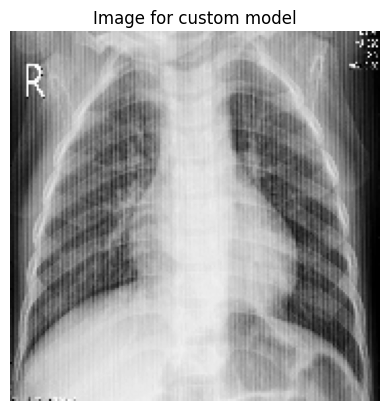

In [4]:
# Reading the image
imageCustomModel = cv2.imread(imagePath, cv2.IMREAD_GRAYSCALE)

# Resize Image
imageCustomModel = cv2.resize(imageCustomModel, (180, 180), interpolation=cv2.INTER_CUBIC)

# Normalization
imageCustomModel = imageCustomModel/255.

# Converting into numpy array of shape [1, 180, 180]
imageCustomModel = np.array([imageCustomModel])
print('Image shape :', imageCustomModel.shape)

# Display Image
plt.imshow(imageCustomModel[0], cmap='gray')
plt.title('Image for custom model')
plt.axis('off')
plt.show()

## Reading the Image for VGG-19 Model

Image shape : (1, 180, 180, 3)


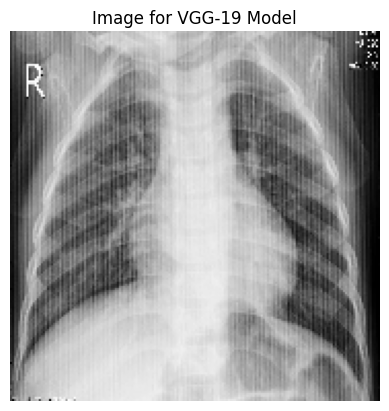

In [5]:
# Reading the image
imageVGGModel = cv2.imread(imagePath)

# Resize Image
imageVGGModel = cv2.resize(imageVGGModel, (180, 180), interpolation=cv2.INTER_CUBIC)

# Normalization
imageVGGModel = imageVGGModel/255.

# Converting into numpy array of shape [1, 180, 180]
imageVGGModel = np.array([imageVGGModel])
print('Image shape :', imageVGGModel.shape)

# Display Image
plt.imshow(imageVGGModel[0])
plt.title('Image for VGG-19 Model')
plt.axis('off')
plt.show()

## Custom Model Prediction (Method 1)

In [6]:
# Load the model
customModel = load_model(r'models\customModel_bestModel.hdf5')

# Predict using custom model
predictCustom = customModel.predict(imageCustomModel)
print('Model predict output :', predictCustom)

# Identifying Max Label
predictCustom = np.argmax(predictCustom, axis=1)[0]
print('Label with max probability :', predictCustom)

# Matching the class number to disease
predictCustom = outputLabels[predictCustom]
print('Disease Identified :', predictCustom)

1/1 [==============================] - 0s 196ms/step
Model predict output : [[1.6813960e-06 9.9973673e-01 2.6156218e-04]]
Label with max probability : 1
Disease Identified : Pneumonia


## Custom Model Prediction (Method 2)

In [7]:
# Initialize the model
customModel = Sequential()
customModel.add(Input((180,180,1)))
customModel.add(ZeroPadding2D((3,3)))
customModel.add(Conv2D(32, (2,2), activation='relu'))
customModel.add(Conv2D(32, (2,2), activation='relu'))
customModel.add(MaxPool2D((3,3)))
customModel.add(Conv2D(64, (2,2), activation='relu'))
customModel.add(Conv2D(64, (2,2), activation='relu'))
customModel.add(MaxPool2D((3,3)))
customModel.add(Conv2D(32, (3,3), activation='relu'))
customModel.add(Conv2D(32, (3,3), activation='relu'))
customModel.add(MaxPool2D(3,3))
customModel.add(Conv2D(8, (3,3)))
customModel.add(Flatten())
customModel.add(Dense(3, activation='softmax'))
customModel.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Load model weights
customModel.load_weights(r'models\customModel_bestModel_weights.hdf5')

# Predict using custom model
predictCustom = customModel.predict(imageCustomModel)
print('Model predict output :', predictCustom)

# Identifying Max Label
predictCustom = np.argmax(predictCustom, axis=1)[0]
print('Label with max probability :', predictCustom)

# Matching the class number to disease
predictCustom = outputLabels[predictCustom]
print('Disease Identified :', predictCustom)

1/1 [==============================] - 0s 128ms/step
Model predict output : [[1.6813960e-06 9.9973673e-01 2.6156218e-04]]
Label with max probability : 1
Disease Identified : Pneumonia


## VGG-19 Model Prediction (Method 1)

In [8]:
# Load the model
vgg19Model = load_model(r'models\vgg19_bestModel.hdf5')

# Predict using VGG-19 model
predictVGG = vgg19Model.predict(imageVGGModel)
print('Model predict output :', predictVGG)

# Identifying Max Label
predictVGG = np.argmax(predictVGG, axis=1)[0]
print('Label with max probability :', predictVGG)

# Matching the class number to disease
predictVGG = outputLabels[predictVGG]
print('Disease Identified :', predictVGG)

1/1 [==============================] - 0s 442ms/step
Model predict output : [[1.3303906e-08 1.0000000e+00 1.8033128e-13]]
Label with max probability : 1
Disease Identified : Pneumonia


## VGG-19 Model Prediction (Method 2)

In [9]:
# Initialize the model
vgg19 = VGG19(include_top=False, weights='imagenet', input_shape=(180,180,3))
for layer in vgg19.layers:
    layer.trainable = False
vgg19Model = Sequential()
vgg19Model.add(vgg19)
vgg19Model.add(Flatten())
vgg19Model.add(Dense(256))
vgg19Model.add(Dense(3, activation='softmax'))
vgg19Model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# Load model weights
vgg19Model.load_weights(r'models\vgg19_bestModel_weights.hdf5')

# Predict using VGG-19 model
predictVGG = vgg19Model.predict(imageVGGModel)
print('Model predict output :', predictVGG)

# Identifying Max Label
predictVGG = np.argmax(predictVGG, axis=1)[0]
print('Label with max probability :', predictVGG)

# Matching the class number to disease
predictVGG = outputLabels[predictVGG]
print('Disease Identified :', predictVGG)

1/1 [==============================] - 0s 392ms/step
Model predict output : [[1.3303906e-08 1.0000000e+00 1.8033128e-13]]
Label with max probability : 1
Disease Identified : Pneumonia
